In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [31]:
df = pd.read_csv("Data.csv")

In [32]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [33]:

df = df.drop_duplicates(keep = "first")

In [34]:

df.isnull().sum()

Category    0
Message     0
dtype: int64

In [35]:
df['Category'] = df['Category'].map({
'ham' : 1, 'spam' : 0
})


In [36]:
df.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
X = df.loc[:,'Message']

In [38]:
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [39]:
Y = df.loc[:,'Category']

In [40]:
Y.head()

0    1
1    1
2    0
3    1
4    1
Name: Category, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)

In [42]:
X_train

2598    Got fujitsu, ibm, hp, toshiba... Got a lot of ...
5418    So how are you really. What are you up to. How...
99                        I see a cup of coffee animation
2321        This pain couldn't have come at a worse time.
2388                               Also where's the piece
                              ...                        
4750    Thanx u darlin!im cool thanx. A few bday drink...
474     Want 2 get laid tonight? Want real Dogging loc...
3273    MOON has come to color your dreams, STARS to m...
4022                We have to pick rayan macleran there.
882     see, i knew giving you a break a few times wou...
Name: Message, Length: 4125, dtype: object

In [43]:
Y_test

3031    1
495     1
2942    1
3911    1
3360    0
       ..
2513    1
1943    1
3038    1
3340    1
5058    1
Name: Category, Length: 1032, dtype: int64

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [45]:
X_train_vec

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 54196 stored elements and shape (4125, 7607)>

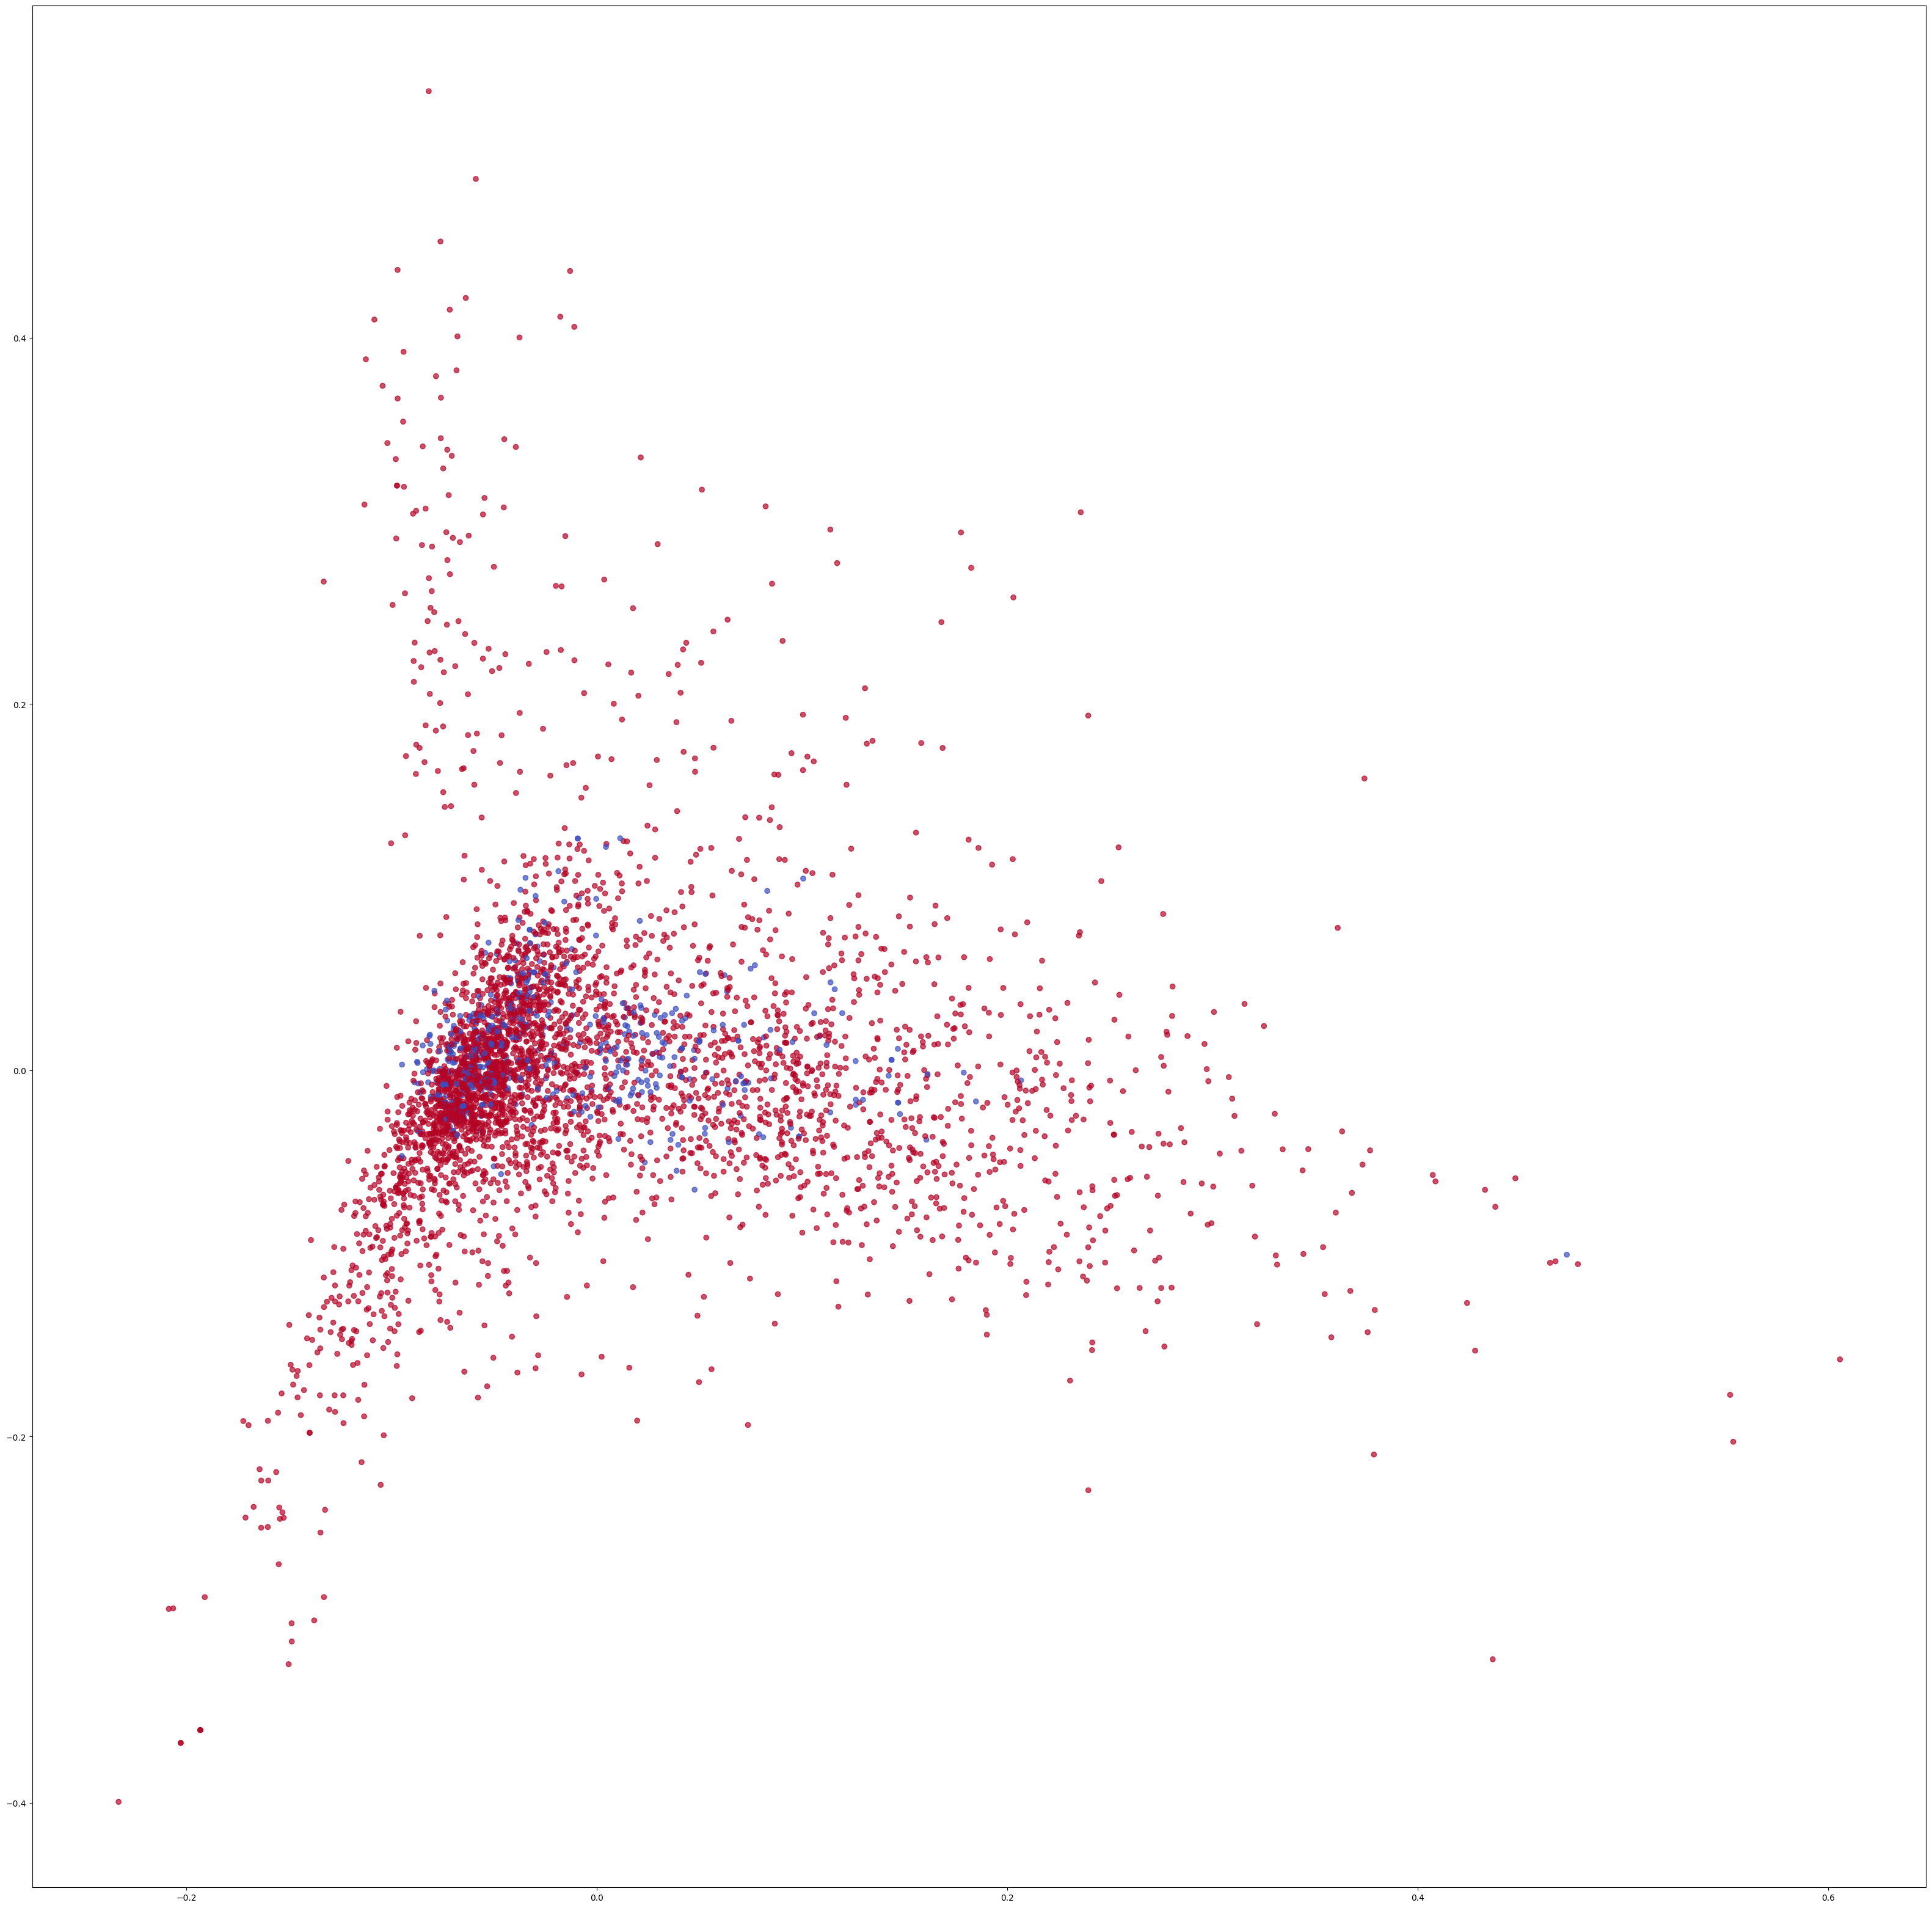

In [46]:
from sklearn.decomposition import PCA    
pca = PCA(n_components=2)   # we want only 2 dimensions (x, y)
X_reduced = pca.fit_transform(X_train_vec)
pca = PCA(n_components=2)   # we want only 2 dimensions (x, y)
plt.figure(figsize=(40,40))
X_reduced = pca.fit_transform(X_train_vec)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1] , c=Y_train, cmap='coolwarm', alpha=0.7)

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
dtc = DecisionTreeClassifier(max_depth = 2)

In [79]:
dtc.fit(X_train_vec,Y_train)

DecisionTreeClassifier(max_depth=2)

In [85]:
dtc.score(X_train_vec,Y_train)*100

93.43030303030304

In [86]:
dtc.score(X_test_vec,Y_test)*100

92.44186046511628

In [87]:
from sklearn.metrics import confusion_matrix, f1_score

In [88]:
cf = confusion_matrix(Y_test, dtc.predict(X_test_vec))
cf

array([[ 66,  70],
       [  8, 888]])

In [89]:
f1_score(Y_test, dtc.predict(X_test_vec))*100

95.79288025889967